In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [2]:
df_orig = pd.read_parquet("event_ano_forstudents.parquet")

In [113]:
df = df_orig.set_index("event_timestamp")
severity_map = {'Information' : 0, 'Error' : 1} # everything else will be mapped to 0
default = 0
df['message_severity_ordinal'] = df.message_severity.apply(lambda x: severity_map[x] if x in severity_map.keys() else default)
#df['message_severity_ordinal'] = df.message_severity.map(severity_map)
df.sort_index(inplace=True)
df['previous_message_number'] = df.shift()['message_number']
df.head(10)

,message_number,message_category,message_severity,an_title,an_description,an_line,an_cell,an_robot,message_severity_ordinal,previous_message_number
event_timestamp,,,,,,,,,,
2015-05-04 16:04:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_21,0,NaN
2015-05-04 16:04:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_21,0,10012
2015-05-04 16:04:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_23,0,20205
2015-05-04 16:04:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_23,0,20205
2015-05-04 16:04:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_24,0,10012
2015-05-04 16:04:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_24,0,10012
2015-05-04 16:05:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_22,0,20205
2015-05-04 16:05:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_25,0,10012
2015-05-04 16:05:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_25,0,10012


In [29]:
df.dtypes

message_number               object
message_category             object
message_severity             object
an_title                     object
an_description               object
an_line                      object
an_cell                      object
an_robot                     object
message_severity_ordinal    float64
dtype: object

In [103]:
df_robot_example = df[(df.an_robot == "robot_21")]


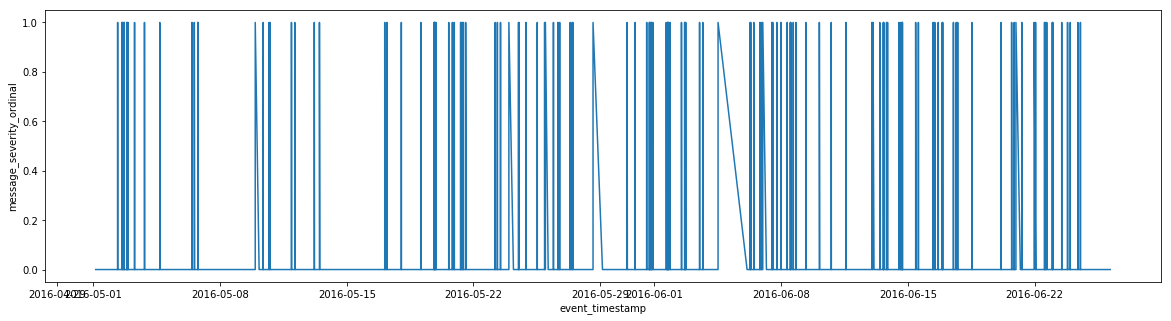

In [104]:
fig, ax = pyplot.subplots(figsize=(20, 5))

df_robot_example = df_robot_example[df_robot_example.index>'2016-05-01']
sns.lineplot(ax=ax, x=df_robot_example.index, y=df_robot_example.message_severity_ordinal, estimator=None)
plt.show()

In [76]:
df[(df.an_robot == "robot_21") & (df.message_severity=="Error")].head()


,message_number,message_category,message_severity,an_title,an_description,an_line,an_cell,an_robot,message_severity_ordinal
event_timestamp,,,,,,,,,
2015-08-27 15:07:08,20205,System,Error,NaN,NaN,line_6,cell_11,robot_21,2.0
2015-08-27 15:08:37,20205,System,Error,NaN,NaN,line_6,cell_11,robot_21,2.0
2015-08-27 20:21:10,20205,System,Error,NaN,NaN,line_6,cell_11,robot_21,2.0
2015-08-28 20:20:51,20205,System,Error,NaN,NaN,line_6,cell_11,robot_21,2.0
2015-08-28 20:55:32,20205,System,Error,NaN,NaN,line_6,cell_11,robot_21,2.0


In [128]:
# count number of errors per robot
df_errors_per_robot = df[df.message_severity=="Error"].groupby("an_robot").message_number.count()

In [129]:
# count number of messages per robot
df_messages_per_robot = df.groupby("an_robot").message_number.count()

In [130]:
# ratio messages / errors
df_ratio_err_msg = df_errors_per_robot / df_messages_per_robot

In [131]:
df_ratio_err_msg.sort_values().tail()

an_robot
robot_137    0.111988
robot_138    0.115952
robot_181    0.118919
robot_182    0.142857
robot_17     1.000000
Name: message_number, dtype: float64

In [135]:
# count number of errors per line
df_errors_per_line = df[df.message_severity=="Error"].groupby("an_line").message_number.count()

In [136]:
# count number of messages per robot
df_messages_per_line = df.groupby("an_line").message_number.count()

In [139]:
# ratio messages / errors
df_ratio_err_msg_line = df_errors_per_line / df_messages_per_line
df_ratio_err_msg_line.sort_values().tail(10)

an_line
line_18    0.063751
line_24    0.064911
line_10    0.066988
line_6     0.070287
line_2     0.073705
line_17    0.075262
line_15    0.080596
line_12    0.081727
line_9     0.084213
line_8     0.085480
Name: message_number, dtype: float64

In [140]:
# analyze whether there are messages that occur pretty often before an error
df[df.message_severity=="Error"].groupby('previous_message_number').message_number.count().sort_values().tail()

previous_message_number
10011     2081
20205     4093
50024    12659
10125    34021
10012    61314
Name: message_number, dtype: int64

In [ ]:
# overall goal for ML methods: transfer raw data into a dataframe that can be used for clustering / classification

# generate (potentially) explaining variables: no_of_errors, ratio_no_of_errors, no_of_messages_when_error,
# no_of_warnings_before_error etc.

# this can be put into a clustering algorithm OR with the no_of_errors_per_month for example as target
# into a classification algorithm

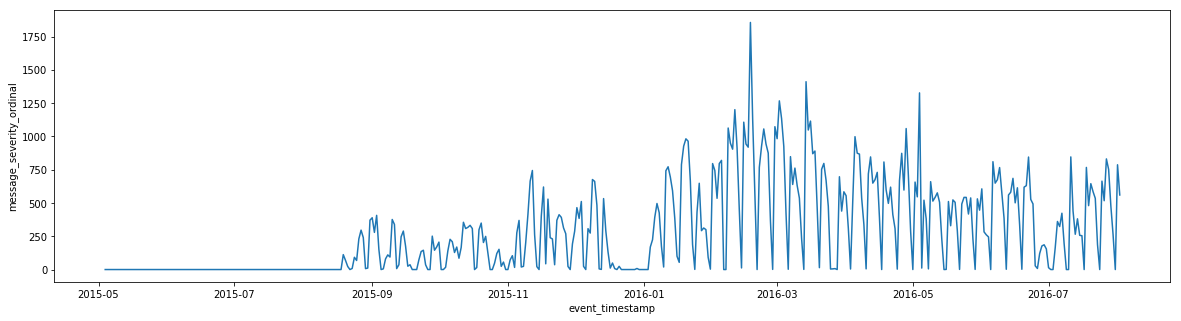

In [150]:
# resample to days - are there any patterns in the time series itself?
fig, ax = pyplot.subplots(figsize=(20, 5))
df_days = df.message_severity_ordinal.resample('1d').sum()
sns.lineplot(x=df_days.index, y=df_days, ax=ax)
plt.show()

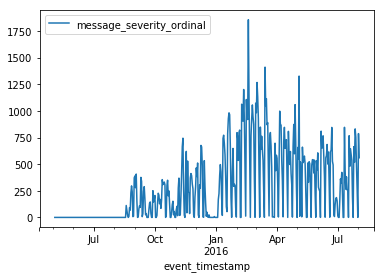

In [161]:
# this is the same but DateTimeIndex not required
df_robot_index.groupby(pd.Grouper(freq='1d', level=0)).sum().plot()
plt.show()

In [164]:
# add a new column which states the day
df_time_cols = df.copy()
df_time_cols['day'] = df_time_cols.index.map(lambda x: x.day)

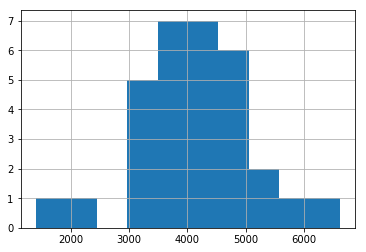

In [169]:
df_time_cols.groupby('day').message_severity_ordinal.sum().hist()
plt.show()

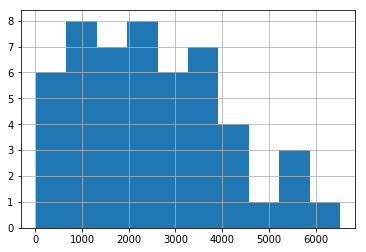

In [170]:
df_time_cols['week'] = df_time_cols.index.map(lambda x: x.week)
df_time_cols.groupby('week').message_severity_ordinal.sum().hist()
plt.show()

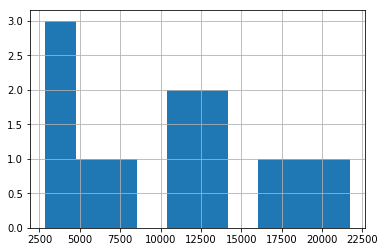

In [171]:
df_time_cols['month'] = df_time_cols.index.map(lambda x: x.month)
df_time_cols.groupby('month').message_severity_ordinal.sum().hist()
plt.show()

In [188]:
# add difference to previous event and assume that events should be in the same minute
df['time_delta_to_previous'] = df.reset_index().event_timestamp.diff().values

In [189]:
df.tail()

,message_number,message_category,message_severity,an_title,an_description,an_line,an_cell,an_robot,message_severity_ordinal,previous_message_number,time_delta_to_previous
event_timestamp,,,,,,,,,,,
2016-08-02 23:32:46,41630,Program,Warning,NaN,NaN,line_15,cell_19,robot_116,0,10271,00:28:43
2016-08-02 23:33:12,41630,Program,Warning,NaN,NaN,line_15,cell_19,robot_116,0,41630,00:00:26
2016-08-02 23:33:14,41630,Program,Warning,NaN,NaN,line_15,cell_19,robot_116,0,41630,00:00:02
2016-08-02 23:33:15,41630,Program,Warning,NaN,NaN,line_15,cell_19,robot_116,0,41630,00:00:01
2016-08-02 23:58:43,10125,Operational,Information,NaN,NaN,line_20,cell_6,robot_154,0,41630,00:25:28


In [194]:
df['within_one_minute'] = df.time_delta_to_previous < '1min'

In [195]:
df.dtypes

message_number                       object
message_category                     object
message_severity                     object
an_title                             object
an_description                       object
an_line                              object
an_cell                              object
an_robot                             object
message_severity_ordinal              int64
previous_message_number              object
time_delta_to_previous      timedelta64[ns]
within_one_minute                      bool
dtype: object

In [199]:
df.head(100)

,message_number,message_category,message_severity,an_title,an_description,an_line,an_cell,an_robot,message_severity_ordinal,previous_message_number,time_delta_to_previous,within_one_minute
event_timestamp,,,,,,,,,,,,
2015-05-04 16:04:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_21,0,NaN,NaT,False
2015-05-04 16:04:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_21,0,10012,00:00:00,True
2015-05-04 16:04:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_23,0,20205,00:00:00,True
2015-05-04 16:04:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_23,0,20205,00:00:00,True
2015-05-04 16:04:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_24,0,10012,00:00:00,True
2015-05-04 16:04:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_24,0,10012,00:00:00,True
2015-05-04 16:05:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_22,0,20205,00:01:00,False
2015-05-04 16:05:00,10012,Operational,Sicherheitsstopp-Zustand,NaN,NaN,line_6,cell_11,robot_25,0,10012,00:00:00,True
2015-05-04 16:05:00,20205,System,Automatik-Sicherheitshalt offen,NaN,NaN,line_6,cell_11,robot_25,0,10012,00:00:00,True


In [202]:
df.loc[df.message_severity=='Error', 'delta_to_prev_error'] = df[df.message_severity=='Error'].reset_index().event_timestamp.diff().values
#df['time_delta_to_previous_error'] = df.reset_index().event_timestamp.diff().values

In [205]:
# check column delta to previous error
df[df.message_severity=='Error'].head()

,message_number,message_category,message_severity,an_title,an_description,an_line,an_cell,an_robot,message_severity_ordinal,previous_message_number,time_delta_to_previous,within_one_minute,delta_to_prev_error
event_timestamp,,,,,,,,,,,,,
2015-08-19 06:00:32,71058,IOCommunication,Error,NaN,NaN,line_11,cell_3,robot_76,1,71518,00:20:33,False,NaT
2015-08-19 06:00:33,40228,Program,Error,NaN,NaN,line_11,cell_3,robot_76,1,10020,00:00:00,True,00:00:01
2015-08-19 06:00:33,41555,Program,Error,NaN,NaN,line_11,cell_3,robot_76,1,40228,00:00:00,True,00:00:00
2015-08-19 06:00:39,71058,IOCommunication,Error,NaN,NaN,line_11,cell_11,robot_75,1,10021,00:00:01,True,00:00:06
2015-08-19 06:00:39,41555,Program,Error,NaN,NaN,line_11,cell_11,robot_75,1,71058,00:00:00,True,00:00:00


In [247]:
# calculate the number of errors per robot and delta_to_previous_error
df_delta_to_prev_error = df[~df.delta_to_prev_error.isna()].groupby(['an_robot','delta_to_prev_error']).message_number.count()
df_delta_to_prev_error = df_delta_to_prev_error.reset_index()
df_delta_to_prev_error.rename(columns={"message_number": "number_of_errors"}, inplace=True)
df_delta_to_prev_error.head()

,an_robot,delta_to_prev_error,number_of_errors
0,robot_0,00:00:00,10
1,robot_0,00:00:01,5
2,robot_0,00:00:07,1
3,robot_0,00:00:08,1
4,robot_0,00:00:09,2


In [248]:
df_delta_to_prev_error.dtypes

an_robot                        object
delta_to_prev_error    timedelta64[ns]
number_of_errors                 int64
dtype: object

In [251]:
# convert to numeric for plotting (and convert from nanoseconds to seconds)
df_delta_to_prev_error['delta_numeric'] = pd.to_numeric(df_delta_to_prev_error.delta_to_prev_error) / 1000000000.0

In [254]:
df_delta_to_prev_error.head()

,an_robot,delta_to_prev_error,number_of_errors,delta_numeric
0,robot_0,00:00:00,10,0.0
1,robot_0,00:00:01,5,1.0
2,robot_0,00:00:07,1,7.0
3,robot_0,00:00:08,1,8.0
4,robot_0,00:00:09,2,9.0


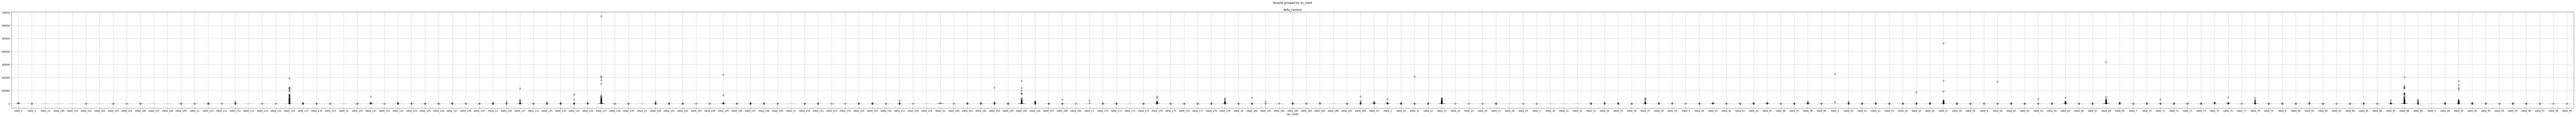

In [267]:
df_delta_to_prev_error[['delta_numeric','an_robot']].boxplot(by='an_robot', figsize=(200,8))
plt.show()

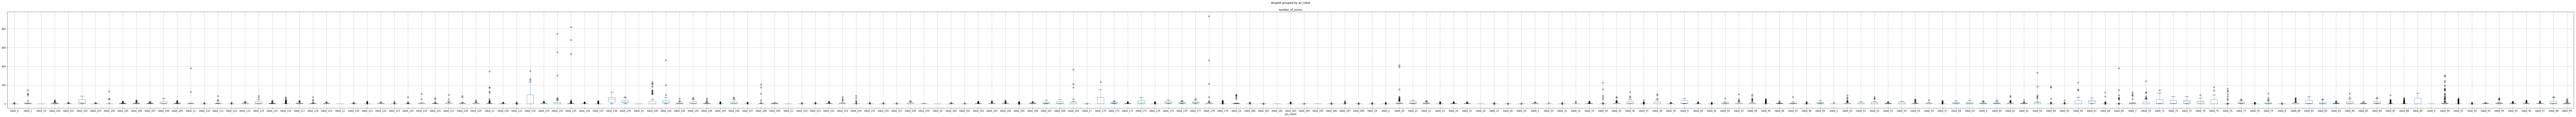

In [266]:
df_delta_to_prev_error[['number_of_errors','an_robot']].boxplot(by='an_robot', figsize=(200,8))
plt.show()

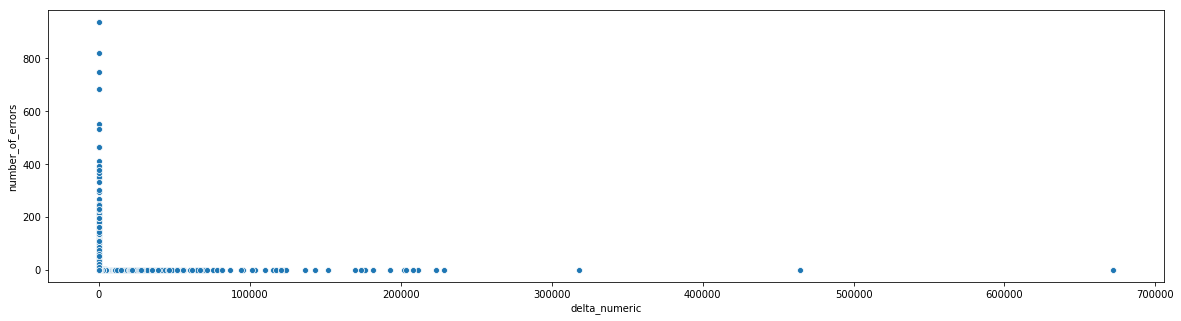

In [269]:
fig, ax = pyplot.subplots(figsize=(20, 5))
sns.scatterplot(x=df_delta_to_prev_error.delta_numeric, y=df_delta_to_prev_error.number_of_errors)
plt.show()